In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nsepy import get_history
from datetime import date
%matplotlib inline

In [13]:
start=date(2016,1,1)
end=date(2019,1,1)
hdfc=get_history(symbol='hdfc',start=start,end=end)
axis=get_history(symbol='axisbank',start=start,end=end)
icici=get_history(symbol='icicibank',start=start,end=end)
idfc=get_history(symbol='idfcfirstb',start=start,end=end)

In [22]:
hdfc=hdfc.Close
axis=axis.Close
icici=icici.Close
idfc=idfc.Close

In [24]:
stocks=pd.concat([hdfc,axis,icici,idfc],axis=1)

In [26]:
stocks.head()

,HDFC,AXIS,ICICI,IDFC
Date,,,,
2016-01-01,1258.45,449.90,263.00,60.70
2016-01-04,1216.70,438.40,255.55,58.95
2016-01-05,1209.40,436.45,256.70,59.00
2016-01-06,1209.30,430.70,250.10,57.75
2016-01-07,1179.45,409.25,246.75,55.90


In [30]:
stocks.pct_change(1).mean()            #daily mean return

HDFC     0.000735
AXIS     0.000624
ICICI    0.000645
IDFC    -0.000223
dtype: float64

In [29]:
stocks.pct_change(1).corr()  #correlation of return

,HDFC,AXIS,ICICI,IDFC
HDFC,1.000000,0.257778,0.275291,0.224577
AXIS,0.257778,1.000000,0.526407,0.319040
ICICI,0.275291,0.526407,1.000000,0.294079
IDFC,0.224577,0.319040,0.294079,1.000000


In [33]:
#Logarithmic return
log_ret=np.log(stocks/stocks.shift(1))
log_ret.head()

,HDFC,AXIS,ICICI,IDFC
Date,,,,
2016-01-01,NaN,NaN,NaN,NaN
2016-01-04,-0.033739,-0.025894,-0.028736,-0.029254
2016-01-05,-0.006018,-0.004458,0.004490,0.000848
2016-01-06,-0.000083,-0.013262,-0.026047,-0.021414
2016-01-07,-0.024993,-0.051086,-0.013485,-0.032559


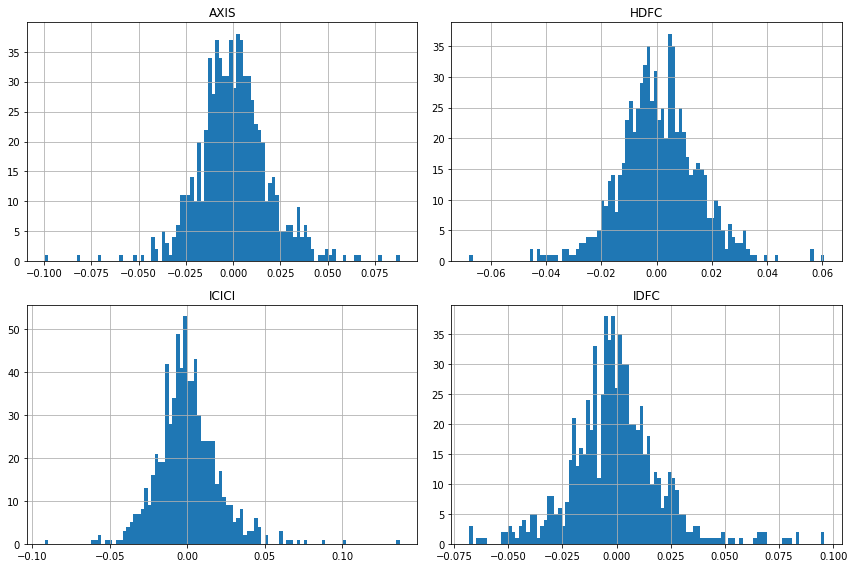

In [35]:
#plotting return histogram
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [37]:
log_ret.mean()

HDFC     0.000631
AXIS     0.000449
ICICI    0.000438
IDFC    -0.000454
dtype: float64

In [38]:
log_ret.cov()*252

,HDFC,AXIS,ICICI,IDFC
HDFC,0.051986,0.017552,0.020484,0.017651
AXIS,0.017552,0.088565,0.050535,0.032508
ICICI,0.020484,0.050535,0.103725,0.032483
IDFC,0.017651,0.032508,0.032483,0.116084


# Visualizing the price graph

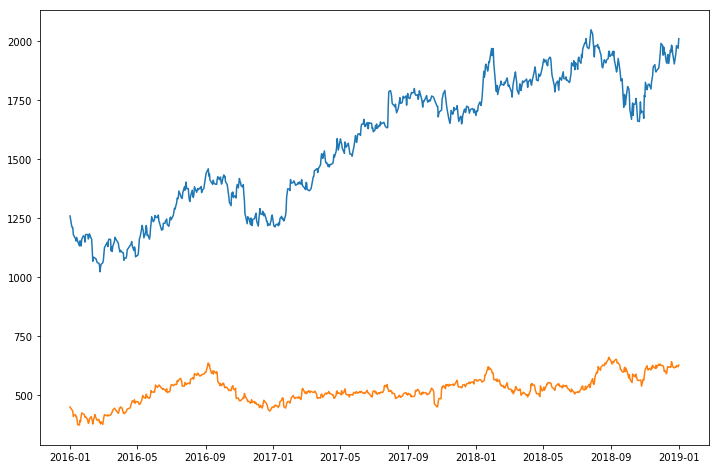

In [49]:
plt.figure(figsize=(12,8))
plt.plot(stocks.HDFC)
plt.plot(stocks.AXIS)

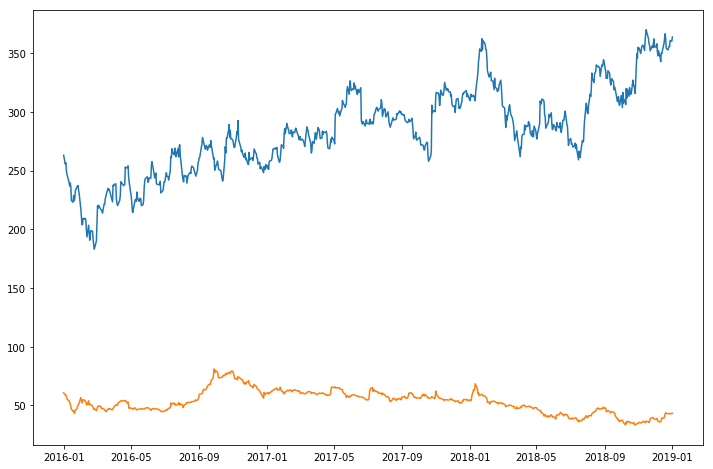

In [45]:
plt.figure(figsize=(12,8))
plt.plot(stocks.ICICI)
plt.plot(stocks.IDFC)

# Assigning weight to portfolio

In [51]:
np.random.seed(101)
print(stocks.columns)

Index(['HDFC', 'AXIS', 'ICICI', 'IDFC'], dtype='object')


In [55]:
weights=np.array(np.random.random(4))  #initializing random weight
print("Random weights are :",weights)

Random weights are : [0.72154386 0.18993895 0.55422759 0.35213195]


In [57]:
weights=weights/np.sum(weights)  #Balancing the weights
print("Balanced weights are:",weights)

Balanced weights are: [0.39692323 0.10448593 0.3048821  0.19370874]


In [62]:
#Expected return
exp_ret=np.sum((log_ret.mean()*weights)*252)    #assuming 252 business day (annual return)
print(exp_ret)                                #initial return 

0.08640166744480281


In [64]:
#expected volatility
exp_vol=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

In [66]:
#sharpe ratio (expected return / exp_vol)
SR=exp_ret/exp_vol
print(SR)

0.42851465870586825


# Optimization of portfolio weight

   # Part-I (using random guess)

In [68]:
num_ports=5000                 #Taking 5000 guess
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

In [71]:
for ind in range(num_ports):
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)
    
    #saving weights in array
    all_weights[ind,:]=weights
    #expected return
    ret_arr[ind]=np.sum((log_ret.mean()*weights)*252)
    #expected volatility
    vol_arr[ind]=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    #sharpe ratio
    sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]

In [75]:
#Getting the maximum sharpe ratio
print("Maximum sharpe ratio:",sharpe_arr.max())
print("Row no :",sharpe_arr.argmax())

Maximum sharpe ratio: 0.7122664504921783
Row no : 4656


In [79]:
#Optimum weights
max_index=sharpe_arr.argmax()
all_weights[max_index,:]

array([8.25707379e-01, 1.44853910e-04, 1.72202148e-01, 1.94561948e-03])

Text(0, 0.5, 'Return')

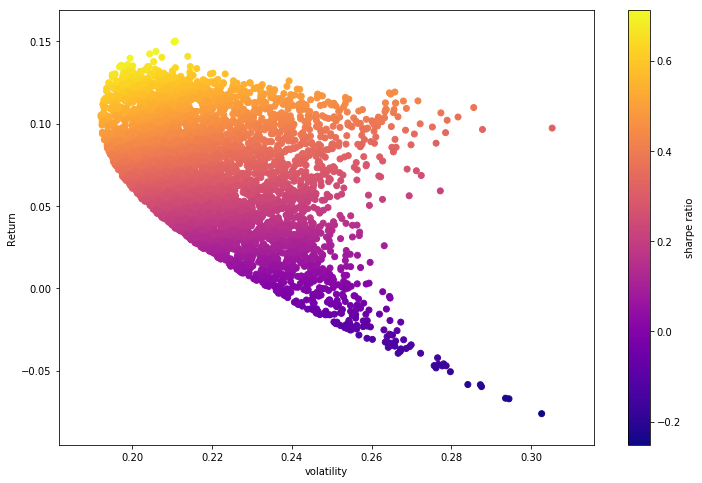

In [77]:
#plotting matrix
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='sharpe ratio')
plt.xlabel('volatility')
plt.ylabel('Return')

Text(0, 0.5, 'Return')

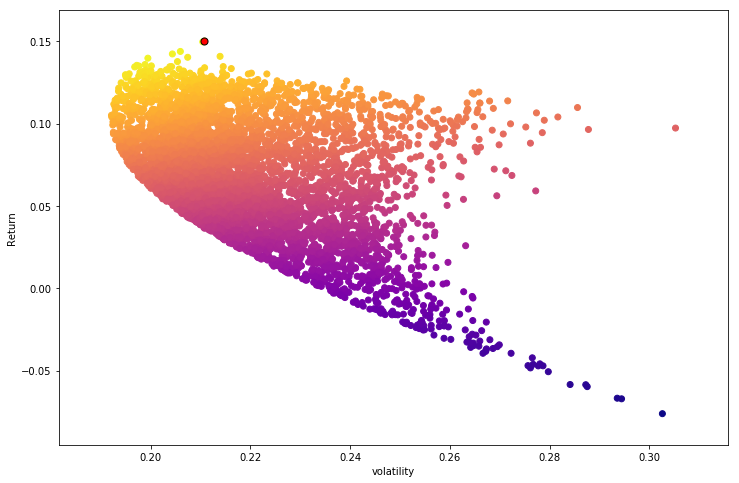

In [84]:
#index 1420 has maximum sharpe ratio
max_sr_ret=ret_arr[max_index]
max_sr_vol=vol_arr[max_index]
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')
#plt.colorbar(label='sharpe ratio')
plt.xlabel('volatility')
plt.ylabel('Return')

# Part-II (using scipy optimization tool)